In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.python.framework import ops
from tqdm.notebook import trange
import random
from sklearn.metrics import f1_score,mean_absolute_error
from tensorflow.keras.datasets.boston_housing import load_data
from sklearn.preprocessing import MinMaxScaler
import glob

In [ ]:
!wget https://github.com/vlsantos-bit/LSTM-Neural/archive/master.zip

--2020-10-19 03:52:52--  https://github.com/vlsantos-bit/LSTM-Neural/archive/master.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/vlsantos-bit/LSTM-Neural/zip/master [following]
--2020-10-19 03:52:53--  https://codeload.github.com/vlsantos-bit/LSTM-Neural/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [  <=>               ]   4.73M  3.25MB/s    in 1.5s    

2020-10-19 03:52:54 (3.25 MB/s) - ‘master.zip’ saved [4959807]



In [ ]:
!unzip master.zip

Archive:  master.zip
498c701120ea6880eaae0500ce58c60ba580f8d3
   creating: LSTM-Neural-master/
  inflating: LSTM-Neural-master/README.md  
  inflating: LSTM-Neural-master/Rede_LSTM.ipynb  
  inflating: LSTM-Neural-master/dado_INMET.csv  


In [ ]:
# Realizando a abertura dos dados 
df = pd.read_csv("LSTM-Neural-master/dado_INMET.csv", delimiter=";",quotechar='"', decimal=".")

In [ ]:
df = df.iloc[20:]
df

,Unnamed: 0,DATA,HORA,PRECI,PRES,MAXPRES,MINPRES,RADIACAO,TEMP_BUL,TEMP_P_O,TEMP_MIN,TEMP_MAX,TEMP_O_MAX,TEMP_O_MIN,UMI_REMAX,UMI_RELMIN,UMI,DIR_VEN,RAJ_MAX,VEN,nan
20,20,2000-09-23,00:00,0.0,1014.5,1014.5,1014.2,-9999.0,13.9,11.0,14.7,13.9,11.0,8.9,83.0,69.0,83.0,110.0,5.8,2.8,NaN
21,21,2000-09-23,01:00,0.0,1014.3,1014.5,1014.3,-9999.0,13.3,10.7,13.9,13.3,11.1,10.4,84.0,82.0,84.0,120.0,6.3,2.6,NaN
22,22,2000-09-23,02:00,0.0,1013.7,1014.3,1013.7,-9999.0,12.9,10.4,13.3,12.9,10.7,10.2,85.0,83.0,84.0,124.0,6.6,2.3,NaN
23,23,2000-09-23,03:00,0.0,1012.9,1013.7,1012.9,-9999.0,12.8,10.5,13.0,12.8,10.5,10.3,85.0,84.0,85.0,121.0,6.1,2.0,NaN
24,24,2000-09-23,04:00,0.0,1012.0,1012.9,1012.0,-9999.0,12.5,10.6,12.9,12.5,10.6,10.4,89.0,86.0,89.0,130.0,6.3,2.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168951,8755,2019/12/31,1900 UTC,0.0,996.9,997.5,996.9,2934.3,38.7,16.0,40.3,38.2,18.9,15.1,32.0,25.0,26.0,299.0,4.5,1.5,NaN
168952,8756,2019/12/31,2000 UTC,0.0,997.3,997.4,996.8,743.0,36.4,18.5,39.0,36.3,18.5,15.7,35.0,26.0,35.0,330.0,4.1,1.5,NaN
168953,8757,2019/12/31,2100 UTC,0.2,1000.3,1000.3,997.3,29.3,26.8,21.3,36.4,26.8,22.1,18.5,74.0,35.0,72.0,285.0,14.9,2.0,NaN
168954,8758,2019/12/31,2200 UTC,0.6,1000.8,1001.0,1000.3,13.4,24.7,22.5,26.8,24.5,23.1,21.4,91.0,72.0,88.0,87.0,5.0,0.9,NaN


In [ ]:
#Temperatura Máxima____________________________________________________________________________________
tmx = df['TEMP_MAX']
#tmax=tmx.replace([np.inf, -np.inf,'-9999.0',-9999.0], np.nan)
#Temperatura Minima_____________________________________________________________________________________
tmin = df['TEMP_MIN']
#tmin=tmn.replace([np.inf, -np.inf,'-9999.0',-9999.0], np.nan)
tmin.size

168936

In [ ]:
#time
t = df['DATA']

In [ ]:
#Realizanod média dos dados
temp = ((tmx+tmin)/2)
temp1=pd.DataFrame(temp).dropna()
temp=np.array(temp1,dtype=np.float64)
te=np.concatenate(temp)
#Converter em listas 
te.tolist()
t.tolist()

In [ ]:
#Tempo
tims=[]

In [ ]:
#Dados
dado=[]

In [ ]:
#Função para separar as lista
def sep(lista, n):
    for i in trange(0, len(lista), n):
        x=lista[i:i + n]
        dado.append(x)

In [ ]:
#Separando os dados
sep(te,24)

In [ ]:
#Separando os tempos
sep(t,24)

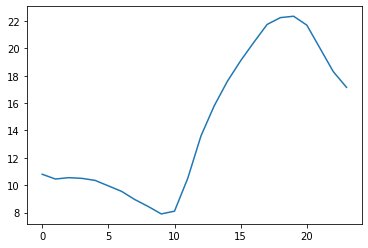

In [ ]:
#Primeiras 24 horas de dados
plt.plot(dado[4])

In [ ]:
dado = pd.DataFrame(dado)
dado.size

168936

In [ ]:
da=dado.replace([np.inf,-np.inf,'-9999.0',-9999.0],np.nan)
da.dropna()
x=np.array(da)
x[700]

array([18.8 , 18.7 , 18.5 , 17.95, 17.9 , 17.85, 18.2 , 17.65, 16.75,
       16.5 , 15.2 , 13.95, 13.5 , 13.65, 13.9 , 13.85, 13.45,   nan,
         nan,   nan,   nan,   nan,   nan,   nan])

In [ ]:
me=da.mean(axis=1)
del (me[2483])

In [ ]:
me.size

7038

Text(0.5, 1.0, 'Média de Temperatura diária - Porto Alegre - Est. INMET, 2000-2019')

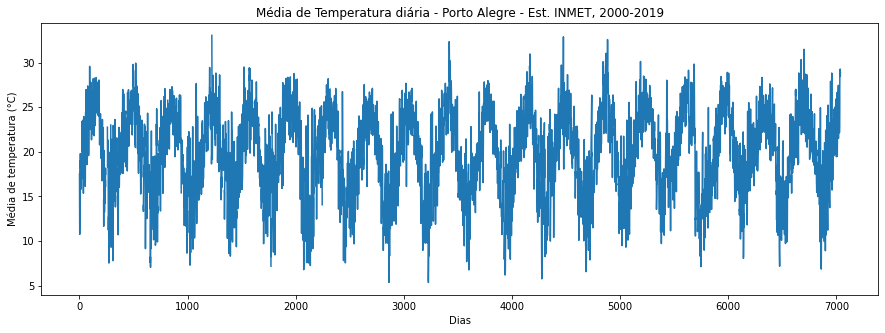

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(me)
plt.xlabel("Dias")
plt.ylabel("Média de temperatura (°C)")
plt.title("Média de Temperatura diária - Porto Alegre - Est. INMET, 2000-2019")

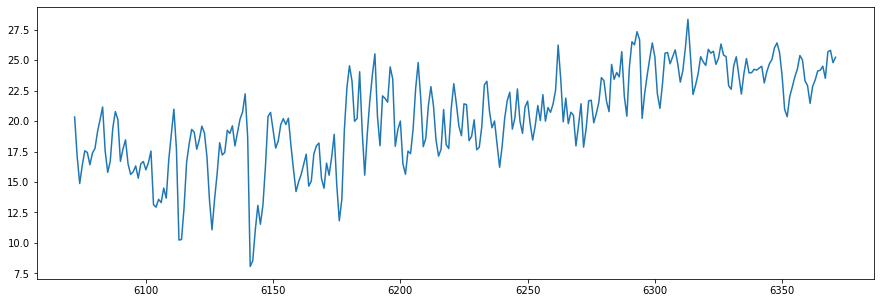

In [ ]:
da=me.dropna()
plt.figure(figsize = (15, 5))
plt.plot(da[6000:6300])

In [ ]:
pre=np.array(da)
pre

array([17.52291667, 15.07916667, 10.75208333, ..., 29.27708333,
       28.46041667, 28.85952381])

In [ ]:
#1 Normalizar os dados 
from sklearn.preprocessing import StandardScaler

In [ ]:
#normalizando dado
pre=np.reshape(pre,(len(pre),1))
scaler = MinMaxScaler(feature_range = (-1, 1))
dado_normalizado = scaler.fit_transform(pre)
dado_normalizado

array([[-0.12167958],
       [-0.29821657],
       [-0.61080593],
       ...,
       [ 0.72744375],
       [ 0.66844759],
       [ 0.69727917]])

In [ ]:
#normalizando dado
n=int(len(dado_normalizado)*0.3)
pres_train=dado_normalizado[:-n]
pres_test=dado_normalizado[-n:]
pres_train.shape

(4877, 1)

In [ ]:
x_train=[]
y_train=[]

# Estruturando o sistema de entrada do conjunto de treinamento e o conjunto de teste
for i in range(6,len(pres_train)-1):
    x_train.append(pres_train[i-6:i])
    y_train.append(pres_train[i][0])
x_train=np.array(x_train)
y_train=np.array(y_train)
#################################################
x_test=[]
y_test=[]
for i in range(6,len(pres_test)-1):
    x_test.append(pres_test[i-6:i])
    y_test.append(pres_test[i][0])
x_test=np.array(x_test)
y_test=np.array(y_test)
y_train.shape

(4870,)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

### Teste Dickey-Fuller

---



---



In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    print('Results of Dickey-Fuller Test:')
    dftest = ts.adfuller(timeseries, autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    test_stationarity(tr)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df2=pd.DataFrame(pre[:])
dftest = adfuller(df2.iloc[:,0].values, autolag='AIC' )
print("SÉRIE ESTÁCIONÁRIA",dftest)

SÉRIE ESTÁCIONÁRIA (-5.388501020096765, 3.5807514444883515e-06, 33, 6933, {'1%': -3.431293563078993, '5%': -2.861956978441577, '10%': -2.5669919537233103}, 28853.337025673653)


In [ ]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
look_back = 30

In [ ]:
# Criando os parâmetros da rede
#1° Modelo de rede 
model = Sequential()
model.add(LSTM(128, activation = 'sigmoid',input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
history = model.fit(x_train, y_train, epochs=200, batch_size=100, validation_data=(x_test, y_test),
                callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 1.5159156562742115
Train Root Mean Squared Error: 1.997015180030116
Test Mean Absolute Error: 1.4548085467277165
Test Root Mean Squared Error: 1.8905484010358593


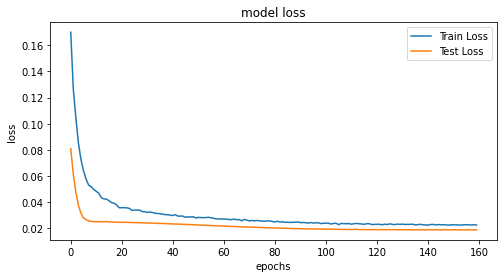

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
#1° TESTE
dataset = pre1.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
look_back = 60
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Criando os parâmetros da rede
#1° Modelo de rede 
model = Sequential()
model.add(LSTM(128, activation = 'sigmoid',input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
history = model.fit(x_train, y_train, epochs=200, batch_size=100, validation_data=(x_test, y_test),
                callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([y_test])
#print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
#print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
#print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
#print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

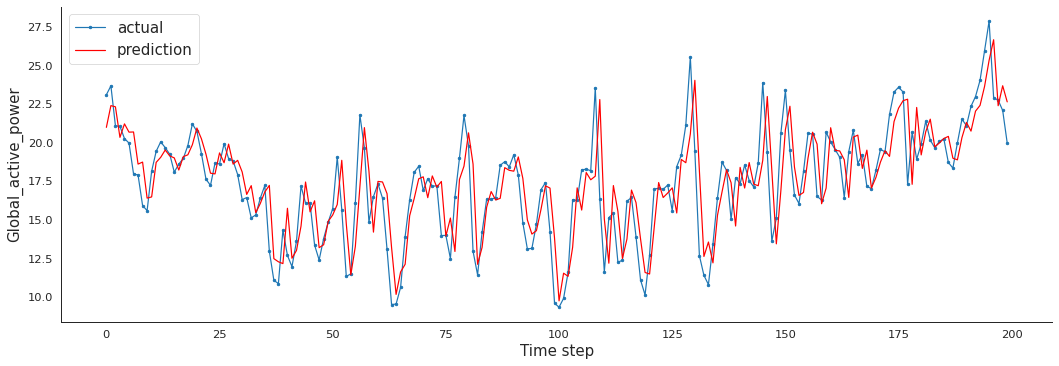

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();